In [29]:
from rdkit import Chem
from rdkit.Chem import Descriptors
from rdkit.Chem import rdMolDescriptors as rdescriptors

import matplotlib.pyplot as plt

import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [2]:
def lipinski_wt(m):
    return Descriptors.MolWt(m)

def lipinski_logpt(m):
    return Descriptors.MolLogP(m)

def lipinski_hba(m):
    return rdescriptors.CalcNumLipinskiHBA(m)

def lipinski_hbd(m):
    return rdescriptors.CalcNumLipinskiHBD(m)

In [3]:
drugbank_input = Chem.SDMolSupplier('../data/drugbank.sdf')
drugbank = [m for m in drugbank_input if m]

In [14]:
lip_array = list([lipinski_wt(m), lipinski_logpt(m), lipinski_hba(m), lipinski_hbd(m)] for m in drugbank)

In [15]:
X = np.array(lip_array)
pca = PCA(n_components=4)
pca.fit(X)

PCA(copy=True, iterated_power='auto', n_components=4, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [23]:
print(pca.explained_variance_ratio_)

[  9.99570494e-01   3.61253166e-04   3.95073204e-05   2.87451072e-05]


In [16]:
scaler = StandardScaler()
scaler.fit(X)
Y = scaler.transform(X)

In [17]:
spca = PCA(n_components=4)
spca.fit(Y)

PCA(copy=True, iterated_power='auto', n_components=4, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [24]:
print(spca.explained_variance_ratio_)

[ 0.7285213   0.22641708  0.03563302  0.0094286 ]


In [25]:
tY = spca.transform(Y)

In [26]:
tY

array([[  1.27974525e+01,   1.65836462e+00,   8.72722641e-03,
         -2.06373252e-02],
       [  6.80077393e+00,   8.11919402e-01,  -6.06557960e-01,
         -3.13199341e-02],
       [  5.72722042e+00,   5.07162949e-02,  -6.27681792e-01,
         -2.69368796e-01],
       ..., 
       [  4.59819506e+00,   1.75707895e+00,  -8.84805808e-02,
          2.68711258e-01],
       [ -4.62229360e-01,  -4.41179055e-01,   7.02880321e-01,
         -2.14726259e-01],
       [ -6.15655966e-01,   5.58744513e-01,   1.98653693e-01,
         -2.59180362e-01]])

In [32]:
def pca_plot(X, *args, highlights=set()):
    plt.figure()
    ax = plt.subplot(111)
    for i, point in enumerate(X):
        x,y = point
        if i in highlights:
            plt.plot([x],[y],"r.", markersize=4)
        else:
            plt.plot([x],[y],"k.", markersize=1)
    plt.show()

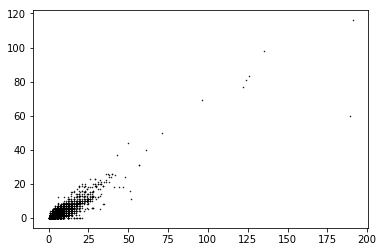

In [33]:
pca_plot(X[:,2:])